# Analyzing temperature and humidity data
## Objectives

- Data wrangling
- Data visualization
- Saving figures

In [3]:
import datetime
import os
from glob import glob

from timeit import default_timer as timer
from datetime import timedelta
import time

PATH = ".\..\Data"
EXT = "*.xls"

all_files = [file
                 for path, subdir, files in os.walk(PATH)
                 for file in glob(os.path.join(path, EXT))]

print ("The available dataset:")
for x in all_files:
    print(x)    
    
total_files=len(all_files)
print("Total no. of files = " +str(total_files))

# Print iterations progress
def printProgressBar (iteration, total, prefix = '', suffix = '', decimals = 1, length = 100, fill = '█', printEnd = "\r"):
    """
    Call in a loop to create terminal progress bar
    @params:
        iteration   - Required  : current iteration (Int)
        total       - Required  : total iterations (Int)
        prefix      - Optional  : prefix string (Str)
        suffix      - Optional  : suffix string (Str)
        decimals    - Optional  : positive number of decimals in percent complete (Int)
        length      - Optional  : character length of bar (Int)
        fill        - Optional  : bar fill character (Str)
        printEnd    - Optional  : end character (e.g. "\r", "\r\n") (Str)
    """
    percent = ("{0:." + str(decimals) + "f}").format(100 * (iteration / float(total)))
    filledLength = int(length * iteration // total)
    bar = fill * filledLength + '-' * (length - filledLength)
    print(f'\r{prefix} |{bar}| {percent}% {suffix}', end = printEnd)
    # Print New Line on Complete
    if iteration == total: 
        print()

The available dataset:
.\..\Data\1 RHT20 11-04-20.xls
.\..\Data\10 RHT20 11-04-20.xls
.\..\Data\2 RHT20 11-04-20.xls
.\..\Data\3 RHT20 11-04-20.xls
.\..\Data\4 RHT20 11-04-20.xls
.\..\Data\5 RHT20 11-04-20.xls
.\..\Data\6 RHT20 11-04-20.xls
.\..\Data\7 RHT20 11-04-20.xls
.\..\Data\8 RHT20 11-04-20.xls
.\..\Data\9 RHT20 11-04-20.xls
Total no. of files = 10


In [4]:
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns

start = timer()

# data read
df_all = pd.DataFrame([])


l = total_files
printProgressBar(0, l, prefix = 'Progress:', suffix = 'Complete', length = 50)

for i,x in enumerate(all_files):
#     print(os.path.basename(x))
    df=pd.read_csv(x, 
                   skiprows=10,
                   sep='\t',
                   lineterminator='\n')

    # data cleaning
    df.drop(['      NO            ','Unnamed: 2','Unnamed: 4'], axis=1, inplace=True)
    df.rename(columns={'   Temp              ':'Temp','  RH                 ':'RH',' TIME \r':'DateTime'},
             inplace=True)
    

    df['Temp'] = [x.strip('') for x in df['Temp']]
    df['Temp'] = [x.replace(' C', '') for x in df['Temp']]
    df['Temp'] = df['Temp'].astype('float')

    df['RH'] = [x.strip('') for x in df['RH']]
    df['RH'] = [x.replace(' %RH', '') for x in df['RH']]
    df['RH'] = df['RH'].astype('float')

    df['DateTime'] = [x.strip('') for x in df['DateTime']]
    df['DateTime'] = [x.replace(' \r', '') for x in df['DateTime']]
    df['DateTime'] = pd.to_datetime(df['DateTime'])
#     df['Date'] = df['DateTime'].dt.date
#     df['Time'] = df['DateTime'].dt.time
    
    df['Sensor'] = int(os.path.basename(x)[0:2])
    df['Filename'] = os.path.basename(x)

    df_all=df_all.append(df)
    
    printProgressBar(i + 1, l, prefix = 'Progress:', suffix = 'Complete', length = 50)
    
    
end = timer()
print('Time elapsed: '+str(timedelta(seconds=end-start)))

df_all.sort_values('DateTime', ascending=True, inplace=True)
# df_all.head()

df_all

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Time elapsed: 0:00:00.286762


,Temp,RH,DateTime,Sensor,Filename
0,21.1,72.4,2020-11-03 11:09:25,3,3 RHT20 11-04-20.xls
0,22.1,67.5,2020-11-03 11:14:22,6,6 RHT20 11-04-20.xls
0,21.8,66.4,2020-11-03 11:14:55,7,7 RHT20 11-04-20.xls
0,21.8,67.1,2020-11-03 11:16:39,2,2 RHT20 11-04-20.xls
0,21.4,70.3,2020-11-03 11:17:14,4,4 RHT20 11-04-20.xls
...,...,...,...,...,...
92,22.2,74.2,2020-11-04 10:18:21,9,9 RHT20 11-04-20.xls
92,20.6,68.7,2020-11-04 10:19:17,5,5 RHT20 11-04-20.xls
93,19.8,72.0,2020-11-04 10:24:25,3,3 RHT20 11-04-20.xls
93,21.8,75.3,2020-11-04 10:29:22,6,6 RHT20 11-04-20.xls


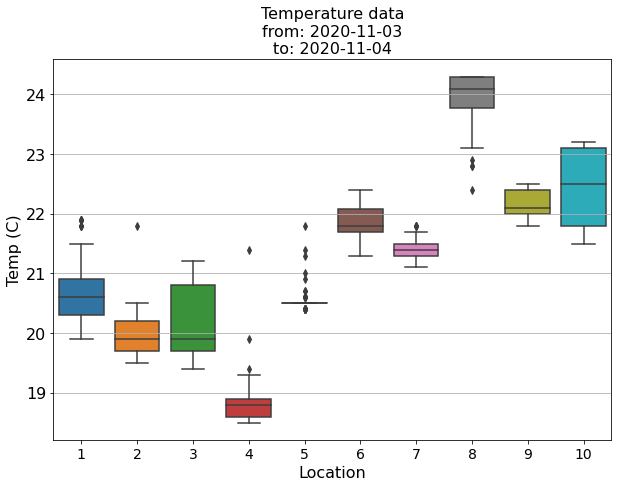

In [8]:
df1=df_all.sort_values('DateTime').reset_index()
start_time1=df1.loc[0,'DateTime'].date()
end_time1=df1.loc[len(df1.index)-1,'DateTime'].date()
# print(start_time1)
# print(end_time1)

df1=df_all.sort_values('Sensor', ascending=True)


plt.figure(figsize=(10,7))
p1=sns.boxplot(
    x='Sensor', 
    y='Temp', 
    data=df1
)


plt.title("Temperature data\n" + "from: " + str(start_time1) + "\nto: "+ str(end_time1), fontsize=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)

plt.xlabel('Location',fontsize=16)
plt.ylabel('Temp (C)',fontsize=16)
plt.savefig(str(datetime.date.today())+"_"+"figure-temp.png", 
            bbox_inches='tight')

p1.yaxis.grid(True) # Hide the horizontal gridlines
p1.xaxis.grid(False) # Show the vertical gridlines

# plt.ylim(15,30)

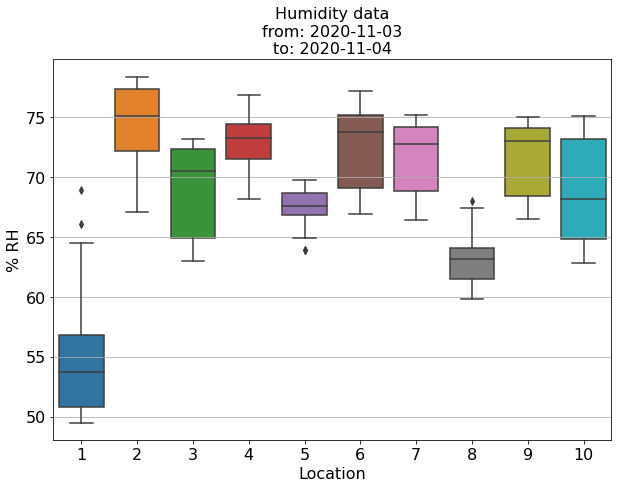

In [21]:
df1=df_all.sort_values('DateTime').reset_index()
start_time1=df1.loc[0,'DateTime'].date()
end_time1=df1.loc[len(df1.index)-1,'DateTime'].date()
# print(start_time1)
# print(end_time1)


df1=df_all.sort_values('Sensor', ascending=True)

plt.figure(figsize=(10,7))
p1=sns.boxplot(
    x='Sensor', 
    y='RH', 
    data=df1
)

# p1=sns.swarmplot(
#    x='Sensor', 
#    y='RH', 
#     data=df_all,
#     color=".1"
# )

plt.title("Humidity data\n" + "from: " + str(start_time1) + "\nto: "+ str(end_time1), fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)


plt.xlabel('Location',fontsize=16)
plt.ylabel('% RH',fontsize=16)
plt.savefig(str(datetime.date.today())+"_"+"figure-humd.png",
            bbox_inches='tight')

p1.yaxis.grid(True) # Hide the horizontal gridlines
p1.xaxis.grid(False) # Show the vertical gridlines

# plt.ylim(0,100)

In [13]:
SensorLoc=5
df1=df_all[df_all['Sensor'] == SensorLoc]
df1

,Temp,RH,DateTime,Sensor,Filename
0,21.8,67.6,2020-11-03 11:19:17,5,5 RHT20 11-04-20.xls
1,21.4,63.9,2020-11-03 11:34:17,5,5 RHT20 11-04-20.xls
2,21.3,63.9,2020-11-03 11:49:17,5,5 RHT20 11-04-20.xls
3,21.0,64.9,2020-11-03 12:04:17,5,5 RHT20 11-04-20.xls
4,20.9,65.3,2020-11-03 12:19:17,5,5 RHT20 11-04-20.xls
...,...,...,...,...,...
88,20.5,68.7,2020-11-04 09:19:17,5,5 RHT20 11-04-20.xls
89,20.6,68.7,2020-11-04 09:34:17,5,5 RHT20 11-04-20.xls
90,20.6,68.8,2020-11-04 09:49:17,5,5 RHT20 11-04-20.xls
91,20.6,68.8,2020-11-04 10:04:17,5,5 RHT20 11-04-20.xls


Text(0.5, 0, '10')

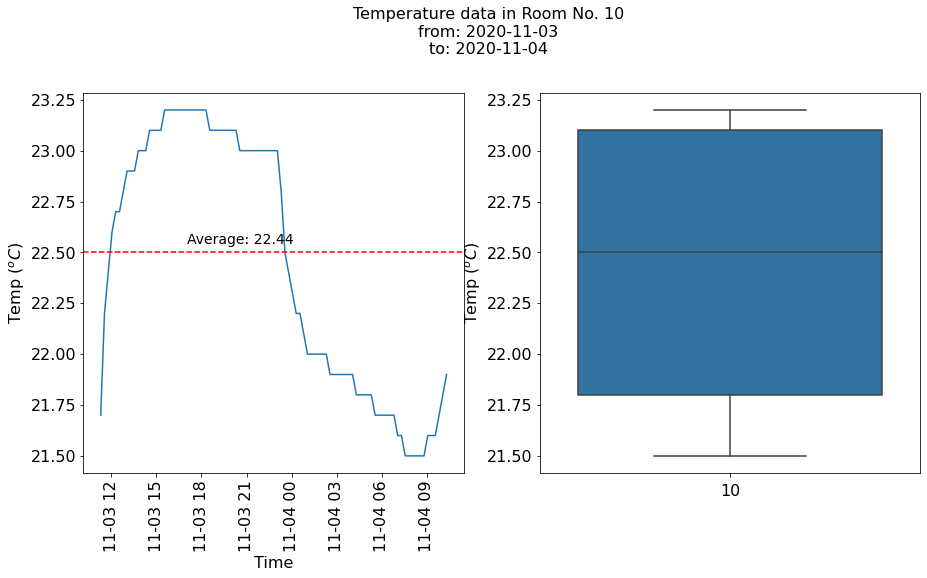

In [24]:
#plot timeseries
SensorLoc=10
df1=df_all[df_all['Sensor'] == SensorLoc]

# df1=df1[df1['DateTime'].dt.year == 2020]
# df1=df1[df1['DateTime'] > pd.Timestamp(2020,6,30)]
# df1=df1[(df1['DateTime'] > pd.Timestamp(2020,7,1)) & (df1['DateTime'] < pd.Timestamp(2020,7,2))]


df1=df1.sort_values('DateTime').reset_index()
start_time1=df1.loc[0,'DateTime'].date()
end_time1=df1.loc[len(df1.index)-1,'DateTime'].date()

# df1=df_all[df_all.index == datetime.date(2019,12,30)]

fig, axs = plt.subplots(1, 2, figsize=(15,7))

plt.suptitle(
    "Temperature data in Room No. "+ str(SensorLoc) + "\nfrom: " + str(start_time1) + "\nto: "+ str(end_time1), 
    fontsize=16,
    y=1.05
)

Yd='Temp'
Xd='DateTime'

sns.lineplot(ax=axs[0], data=df1, x=Xd, y=Yd)
sns.boxplot(ax=axs[1], data=df1, y=Yd)

plt.sca(axs[0])
plt.xticks(rotation='vertical')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Temp $(^{o}C)$',fontsize=16)

plt.axhline(
    df1[Yd].median(), 
    ls='--',
    c='r'
)
# plt.ylim(15,35)

plt.annotate("Average: "+str(round(df1['Temp'].mean(),2)),
             xy=(
                 df1['DateTime'].iloc[int(len(df1)/4)],
                 round(df1['Temp'].mean(),2)+0.1
             ),
             fontsize=14
            )

plt.sca(axs[1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Temp $(^{o}C)$',fontsize=16)
plt.xlabel(SensorLoc,fontsize=16)
# plt.ylim(15,35)

Text(0.5, 0, '5')

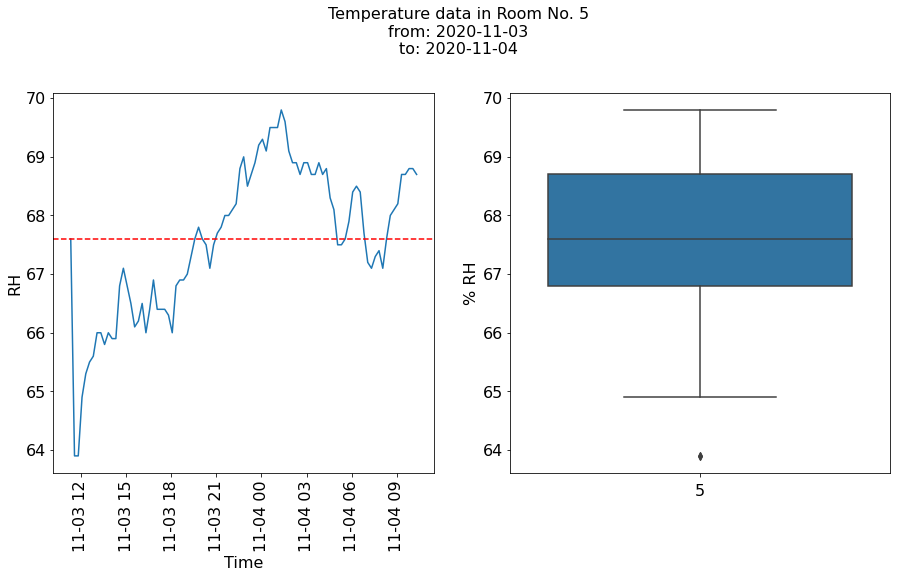

In [19]:
#plot timeseries
SensorLoc=5
df1=df_all[df_all['Sensor'] == SensorLoc]

# df1=df1[df1['DateTime'].dt.year == 2020]
# df1=df1[df1['DateTime'] > pd.Timestamp(2020,6,30)]
# df1=df1[(df1['DateTime'] > pd.Timestamp(2020,7,1)) & (df1['DateTime'] < pd.Timestamp(2020,7,2))]


df1=df1.sort_values('DateTime').reset_index()
start_time1=df1.loc[0,'DateTime'].date()
end_time1=df1.loc[len(df1.index)-1,'DateTime'].date()


fig, axs = plt.subplots(1, 2, figsize=(15,7))

plt.suptitle(
    "Temperature data in Room No. "+ str(SensorLoc) + "\nfrom: " + str(start_time1) + "\nto: "+ str(end_time1), 
    fontsize=16,
    y=1.05
)

Yd='RH'
Xd='DateTime'

sns.lineplot(ax=axs[0], data=df1, x=Xd, y=Yd)
sns.boxplot(ax=axs[1], data=df1,y=Yd)

plt.sca(axs[0])
plt.xticks(rotation='vertical')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel(Yd,fontsize=16)

plt.axhline(
    df1[Yd].median(), 
    ls='--',
    c='r'
)
# plt.ylim(0,100)

# plt.annotate("Average: "+str(round(df1['RH'].mean(),2)),
#              xy=(
#                  #start_time,
#                  df1['DateTime'].iloc[int(len(df1)/2)],
#                  round(df1['RH'].mean(),2)+0.1
#              ),
#              fontsize=14
#             )

plt.sca(axs[1])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('% RH',fontsize=16)
plt.xlabel(SensorLoc,fontsize=16)

# plt.ylim(0,100)